In [3]:
#Loading the data
import pandas as pd
import os

# Load the data
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/standard_test.csv')
data = pd.read_csv(input_csv_path)

# Fill missing 'distance_x' with the previous value
data['distance_x'] = data['distance_x'].fillna(method='ffill')

# Fill missing 'value' with 0
data['value'] = data['value'].fillna(0)

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/standard_test_cleaned.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path, data.head()  # Return the path to the new CSV and display the first few rows of the cleaned data.

('/home/rivermar/Desktop/MRS_Master_Project/rosbags/simulation/standard_test_cleaned.csv',
    timestamp  distance_x  value
 0     84.156    0.023411    0.0
 1     84.164    0.023411    0.0
 2     84.164    0.023411    2.0
 3     84.168    0.023411    2.0
 4     84.176    0.023411    0.0)

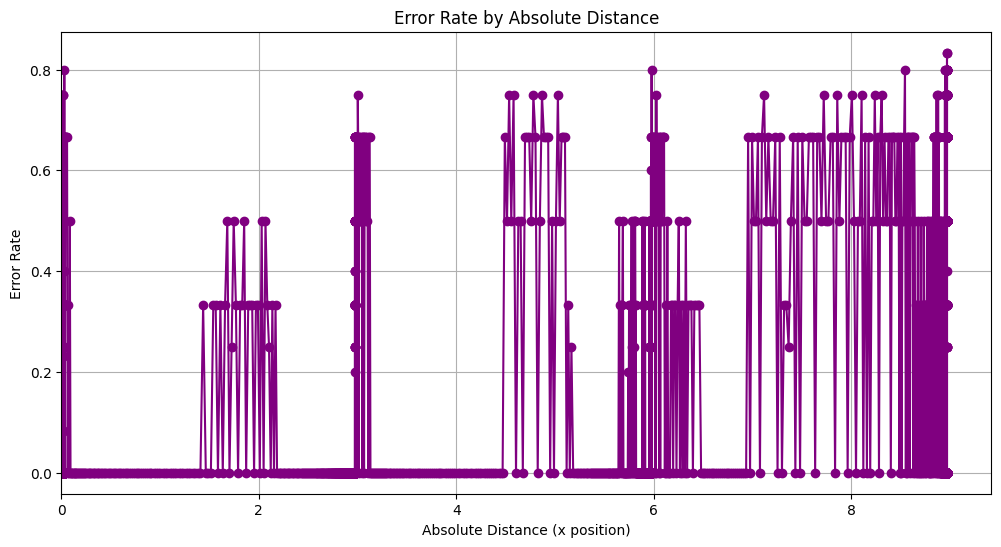

In [25]:
#Make all distances positive
import pandas as pd
import os

import matplotlib.pyplot as plt
data['distance_x'] = data['distance_x'].abs()

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/standard_test_cleaned.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path, data.head(50)  # Return the path to the new CSV and display the first few rows of the cleaned data.



# Recalculate error rates with absolute distances
data['is_error'] = data['value'].apply(lambda x: 1 if x < 0 else 0)

error_rate_by_abs_distance = data.groupby('distance_x')['is_error'].mean().sort_index()
# Plot error rates with absolute distances
plt.figure(figsize=(12, 6))
plt.plot(error_rate_by_abs_distance.index, error_rate_by_abs_distance.values, marker='o', linestyle='-', color='purple')
plt.title('Error Rate by Absolute Distance')
plt.xlabel('Absolute Distance (x position)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts from 0
plt.show()

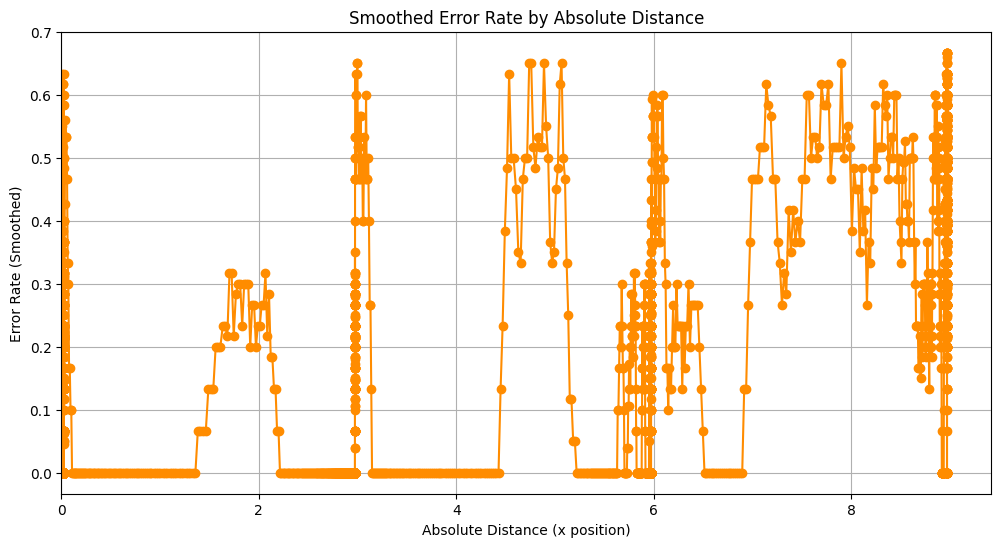

In [26]:
# Apply a moving average to smooth the data and reduce spikes
# Choosing a window size that balances smoothness with retaining the underlying trend
window_size = 5
smoothed_error_rate_abs = error_rate_by_abs_distance.rolling(window=window_size, center=True).mean()

# Plot the smoothed error rates against absolute distances
plt.figure(figsize=(12, 6))
plt.plot(smoothed_error_rate_abs.index, smoothed_error_rate_abs.values, marker='o', linestyle='-', color='darkorange')
plt.title('Smoothed Error Rate by Absolute Distance')
plt.xlabel('Absolute Distance (x position)')
plt.ylabel('Error Rate (Smoothed)')
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts from 0
plt.show()

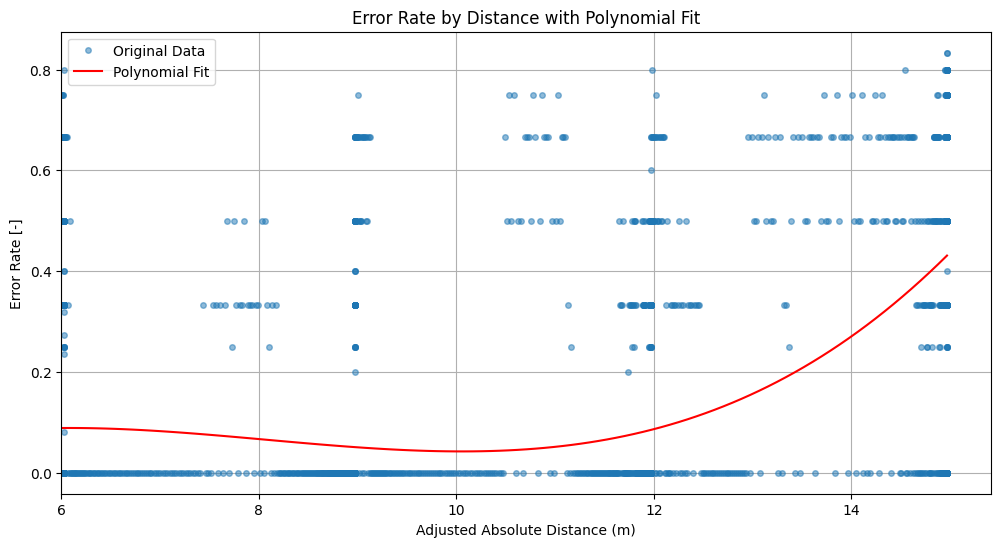

In [30]:
from numpy import polyfit, poly1d
import numpy as np


data['adjusted_distance_x'] = data['distance_x'] + 6
# Recalculate error rates with the adjusted distances
error_rate_by_adjusted_distance = data.groupby('adjusted_distance_x')['is_error'].mean().sort_index()



# Fit a polynomial regression to the adjusted data
coef_adjusted = polyfit(error_rate_by_adjusted_distance.index, error_rate_by_adjusted_distance.values, 3)
poly_adjusted = poly1d(coef_adjusted)

# Generate x and y values for the polynomial fit over the adjusted distances
x_poly_adjusted = np.linspace(error_rate_by_adjusted_distance.index.min(), error_rate_by_adjusted_distance.index.max(), 100)
y_poly_adjusted = poly_adjusted(x_poly_adjusted)

# Plot the original data and the polynomial regression line with adjusted distances
plt.figure(figsize=(12, 6))
plt.plot(error_rate_by_adjusted_distance.index, error_rate_by_adjusted_distance.values, 'o', markersize=4, alpha=0.5, label='Original Data')
plt.plot(x_poly_adjusted, y_poly_adjusted, 'r-', label='Polynomial Fit')
plt.title('Error Rate by Distance with Polynomial Fit')
plt.xlabel('Adjusted Absolute Distance (m)')
plt.ylabel('Error Rate [-]')
plt.legend()
plt.grid(True)
plt.xlim(left=6)  # Adjust the left bound to reflect the distance adjustment
plt.show()

